## **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import statsmodels.api as sm

## **Importing files**

In [2]:
loans_inputs_test = pd.read_csv("loans_inputs_test.csv", index_col = "id")
loans_targets_test = pd.read_csv("loans_targets_test.csv", index_col = "id")
loans_inputs_train = pd.read_csv("loans_inputs_train.csv", index_col = "id")
loans_targets_train = pd.read_csv("loans_targets_train.csv", index_col = "id")

## **Fitting the model**

In [3]:
dummies_list = ['home_ownership:_other_rent',
 'home_ownership:_none_own',
 'home_ownership:_mortgage_any',
 'purpose:debt_consolidation',
 'purpose:_educational_small_business_renewable_energy_moving',
 'purpose:_medical_house_other',
 'purpose:_major_purchase_vacation_wedding_home_improvement',
 'purpose:_credit_card_car',
 'addr_state:ca',
 'addr_state:fl',
 'addr_state:ny',
 'addr_state:tx',
 'addr_state:_ia_ar_ms_al_ok_nv_la',
 'addr_state:_hi_nm_sd_md_pa_in_mo',
 'addr_state:_nc_nj_tn_mn_mi_va_ky',
 'addr_state:_ne_az_ak_oh_de_ma',
 'addr_state:_wi_ga_ut',
 'addr_state:_il_ct_ri_wy_ks_mt',
 'addr_state:_co_wa_nd_sc_nh',
 'addr_state:_or_dc_id_wv_vt_me',
 'verification_status:not verified',
 'verification_status:source verified',
 'verification_status:verified',
 'initial_list_status:f',
 'initial_list_status:w',
 'application_type:individual',
 'application_type:joint app',
 'hardship_flag:n',
 'hardship_flag:y',
 'hardship_flag:missing',
 'grade:A',
 'grade:B',
 'grade:C',
 'grade:F',
 'grade:D',
 'grade:E',
 'grade:G',
 'term:36',
 'term:60',
 'fico_range:610-660',
 'fico_range:670',
 'fico_range:675',
 'fico_range:680',
 'fico_range:685',
 'fico_range:690',
 'fico_range:695',
 'fico_range:700',
 'fico_range:705',
 'fico_range:710',
 'fico_range:715',
 'fico_range:720',
 'fico_range:725',
 'fico_range:730',
 'fico_range:735',
 'fico_range:740',
 'fico_range:745',
 'fico_range:750',
 'fico_range:755',
 'fico_range:760',
 'fico_range:765',
 'fico_range:770',
 'fico_range:775',
 'fico_range:780',
 'fico_range:785-845',
 'inq_last_6mths:0',
 'inq_last_6mths:1',
 'inq_last_6mths:2',
 'inq_last_6mths:3',
 'inq_last_6mths:>=4',
 'open_acc_6m:0',
 'open_acc_6m:1',
 'open_acc_6m:2',
 'open_acc_6m:3',
 'open_acc_6m:4',
 'open_acc_6m:>=5',
 'open_il_12m:0',
 'open_il_12m:1',
 'open_il_12m:2',
 'open_il_12m:3',
 'open_il_12m:4',
 'open_il_12m:>=5',
 'open_il_24m:0',
 'open_il_24m:1',
 'open_il_24m:2',
 'open_il_24m:3',
 'open_il_24m:4-6',
 'open_il_24m:7-11',
 'open_il_24m:12-16',
 'open_il_24m:>=17',
 'open_rv_12m:0',
 'open_rv_12m:1',
 'open_rv_12m:2',
 'open_rv_12m:3',
 'open_rv_12m:4',
 'open_rv_12m:5',
 'open_rv_12m:6-11',
 'open_rv_12m:>=12',
 'inq_fi:0',
 'inq_fi:1',
 'inq_fi:2',
 'inq_fi:3',
 'inq_fi:4',
 'inq_fi:5',
 'inq_fi:6',
 'inq_fi:7',
 'inq_fi:>=8',
 'inq_last_12m:0',
 'inq_last_12m:1',
 'inq_last_12m:2',
 'inq_last_12m:3',
 'inq_last_12m:4',
 'inq_last_12m:5',
 'inq_last_12m:6',
 'inq_last_12m:7',
 'inq_last_12m:8',
 'inq_last_12m:9',
 'inq_last_12m:10-14',
 'inq_last_12m:>=15',
 'chargeoff_within_12_mths:0',
 'chargeoff_within_12_mths:1',
 'chargeoff_within_12_mths:>=2',
 'num_tl_op_past_12m:0',
 'num_tl_op_past_12m:1',
 'num_tl_op_past_12m:2',
 'num_tl_op_past_12m:3',
 'num_tl_op_past_12m:4',
 'num_tl_op_past_12m:5',
 'num_tl_op_past_12m:6',
 'num_tl_op_past_12m:7',
 'num_tl_op_past_12m:8',
 'num_tl_op_past_12m:9-12',
 'num_tl_op_past_12m:13-16',
 'num_tl_op_past_12m:>=17',
 'pub_rec_bankruptcies:0',
 'pub_rec_bankruptcies:1',
 'pub_rec_bankruptcies:2',
 'pub_rec_bankruptcies:3-5',
 'pub_rec_bankruptcies:>=6',
 'acc_now_delinq:0',
 'acc_now_delinq:1',
 'acc_now_delinq:2',
 'acc_now_delinq:>=3',
 'int_rate:<6.9',
 'int_rate:6.9-7.3',
 'int_rate:8.5-9',
 'int_rate:9-12',
 'int_rate:12-15.6',
 'int_rate:15.6-19.2',
 'int_rate:19.2-24.0',
 'int_rate:>=24.0',
 'revol_util:<18',
 'revol_util:18-35',
 'revol_util:35-54',
 'revol_util:54-71',
 'revol_util:71-90',
 'revol_util:90-107',
 'revol_util:>=107',
 'total_pymnt:<1300.0',
 'total_pymnt:1300.0-5400.0',
 'total_pymnt:5400.0-10800.0',
 'total_pymnt:10800-16200',
 'total_pymnt:16200-20150',
 'total_pymnt:20150-21500',
 'total_pymnt:21500-22850',
 'total_pymnt:22850-25500',
 'total_pymnt:25500-28200',
 'total_pymnt:28200-32250',
 'total_pymnt:32250-35000',
 'total_pymnt:35000-36500',
 'total_pymnt:36500-38000',
 'total_pymnt:39500-41000',
 'total_pymnt:42500-44000',
 'total_pymnt:>=44000',
 'total_rec_prncp:<800',
 'total_rec_prncp:800-1600',
 'total_rec_prncp:1600-2400',
 'total_rec_prncp:2400-3200',
 'total_rec_prncp:3200-4000',
 'total_rec_prncp:4000-4800',
 'total_rec_prncp:4800-8000',
 'total_rec_prncp:8000-9600',
 'total_rec_prncp:9600-10400',
 'total_rec_prncp:10400-11200',
 'total_rec_prncp:>=11200',
 'mnths_since_last_pymnt_d:<6',
 'mnths_since_last_pymnt_d:6-8',
 'mnths_since_last_pymnt_d:8-10',
 'mnths_since_last_pymnt_d:10-35',
 'mnths_since_last_pymnt_d:35-100',
 'mnths_since_last_pymnt_d:>=100',
 'annual_inc:<7000',
 'annual_inc:7000-12000',
 'annual_inc:12000-17000',
 'annual_inc:17000-22000',
 'annual_inc:22000-27000',
 'annual_inc:27000-32000',
 'annual_inc:32000-37000',
 'annual_inc:37000-42000',
 'annual_inc:42000-47000',
 'annual_inc:47000-52000',
 'annual_inc:52000-57000',
 'annual_inc:57000-62000',
 'annual_inc:62000-67000',
 'annual_inc:67000-72000',
 'annual_inc:72000-77000',
 'annual_inc:77000-82000',
 'annual_inc:82000-87000',
 'annual_inc:87000-92000',
 'annual_inc:92000-97000',
 'annual_inc:97000-102000',
 'annual_inc:102000-107000',
 'annual_inc:107000-112000',
 'annual_inc:112000-186000',
 'annual_inc:186000-297500',
 'annual_inc:297500-346000',
 'annual_inc:346000-450000',
 'annual_inc:>=450000']

In [4]:
dummies_references = [
    'grade:G',
    'home_ownership:_other_rent',
    'verification_status:verified',
    'purpose:_educational_small_business_renewable_energy_moving',
    'addr_state:_ia_ar_ms_al_ok_nv_la',
    'initial_list_status:f',
    'application_type:individual',
    'hardship_flag:missing',
    'term:60',
    'num_tl_op_past_12m:>=17',
    'inq_last_6mths:>=4',
    'open_acc_6m:>=5',
    'open_il_12m:>=5',
    'open_il_24m:>=17',
    'open_rv_12m:>=12',
    'inq_fi:>=8',
    'inq_last_12m:>=15',
    'chargeoff_within_12_mths:>=2',
    'num_tl_op_past_12m:>=17',
    'pub_rec_bankruptcies:>=6',
    'int_rate:>=24.0',
    'total_pymnt:<1300.0',
    'annual_inc:<7000',
    'revol_util:<18',
    'mnths_since_last_pymnt_d:>=100',
    'total_rec_prncp:<800',
    'acc_now_delinq:>=3',
]

In [5]:
loans_inputs_train_all_dummies = loans_inputs_train.loc[ :, dummies_list]

In [6]:
loans_inputs_train_all_dummies.head()

,home_ownership:_other_rent,home_ownership:_none_own,home_ownership:_mortgage_any,purpose:debt_consolidation,purpose:_educational_small_business_renewable_energy_moving,purpose:_medical_house_other,purpose:_major_purchase_vacation_wedding_home_improvement,purpose:_credit_card_car,addr_state:ca,addr_state:fl,...,annual_inc:87000-92000,annual_inc:92000-97000,annual_inc:97000-102000,annual_inc:102000-107000,annual_inc:107000-112000,annual_inc:112000-186000,annual_inc:186000-297500,annual_inc:297500-346000,annual_inc:346000-450000,annual_inc:>=450000
id,,,,,,,,,,,,,,,,,,,,,
92797506,0,0,1,False,0,1,0,0,False,False,...,0,0,0,0,0,0,0,0,0,0
139587342,1,0,0,False,0,0,0,1,False,False,...,0,0,0,1,0,0,0,0,0,0
27119844,1,0,0,True,0,0,0,0,True,False,...,0,0,0,0,0,0,0,0,0,0
116257126,0,0,1,True,0,0,0,0,True,False,...,0,0,0,0,0,0,0,0,0,0
145057706,0,1,0,False,0,0,1,0,False,False,...,0,0,0,0,0,0,0,0,0,0


In [7]:
loans_inputs_train = loans_inputs_train_all_dummies.drop(dummies_references, axis=1)

In [8]:
loans_inputs_train.shape

(2340393, 191)

In [9]:
loans_targets_train.shape

(2340393, 1)

## **Dropping not significant variables with p-values test**

In [10]:
logit_model=sm.Logit(loans_targets_train.astype(int),loans_inputs_train.astype(int))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.157583
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               good_bad   No. Observations:              2340393
Model:                          Logit   Df Residuals:                  2340202
Method:                           MLE   Df Model:                          190
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.5916
Time:                        00:28:19   Log-Likelihood:            -3.6881e+05
converged:                       True   LL-Null:                   -9.0296e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
home_ownershi

In [23]:
dummies_list = [
 'home_ownership:_none_own',
 'home_ownership:_mortgage_any',
 'purpose:debt_consolidation',
 'purpose:_medical_house_other',
 'purpose:_major_purchase_vacation_wedding_home_improvement',
 'purpose:_credit_card_car',
 'addr_state:ca',
 'addr_state:fl',
 'addr_state:ny',
 'addr_state:tx',
 'addr_state:_hi_nm_sd_md_pa_in_mo',
 'addr_state:_nc_nj_tn_mn_mi_va_ky',
 'addr_state:_ne_az_ak_oh_de_ma',
 'addr_state:_wi_ga_ut',
 'addr_state:_il_ct_ri_wy_ks_mt',
 'addr_state:_co_wa_nd_sc_nh',
 'addr_state:_or_dc_id_wv_vt_me',
 'verification_status:not verified',
 'verification_status:source verified',
 'initial_list_status:w',
 'application_type:joint app',
 'hardship_flag:n',
 'hardship_flag:y',
 'grade:A',
 'grade:B',
 'grade:C',
 'grade:F',
 'grade:D',
 'grade:E',
 'term:36',
 'fico_range:610-660',
 'fico_range:670',
 'fico_range:675',
 'fico_range:680',
 'fico_range:685',
 'fico_range:690',
 'fico_range:695',
 'fico_range:700',
 'fico_range:705',
 'fico_range:710',
 'fico_range:715',
 'fico_range:720',
 'fico_range:725',
 'fico_range:730',
 'fico_range:735',
 'fico_range:740',
 'fico_range:745',
 'fico_range:750',
 'fico_range:755',
 'fico_range:760',
 'fico_range:765',
 'fico_range:770',
 'fico_range:775',
 'fico_range:780',
 'fico_range:785-845',
 'inq_last_6mths:0',
 'inq_last_6mths:1',
 'inq_last_6mths:2',
 'inq_last_6mths:3',
 'open_il_12m:0',
 'open_il_12m:1',
 'open_il_12m:2',
 'open_il_12m:3',
 'open_il_12m:4',
 'open_il_24m:0',
 'open_il_24m:1',
 'open_il_24m:2',
 'open_il_24m:3',
 'open_il_24m:4-6',
 'open_il_24m:7-11',
 'open_il_24m:12-16',
 'inq_fi:0',
 'inq_fi:1',
 'inq_fi:2',
 'inq_fi:3',
 'inq_fi:4',
 'inq_fi:5',
 'inq_fi:6',
 'inq_fi:7',
 'inq_last_12m:0',
 'inq_last_12m:1',
 'inq_last_12m:2',
 'inq_last_12m:3',
 'inq_last_12m:4',
 'inq_last_12m:5',
 'inq_last_12m:6',
 'inq_last_12m:7',
 'inq_last_12m:8',
 'inq_last_12m:9',
 'inq_last_12m:10-14',
 'chargeoff_within_12_mths:0',
 'chargeoff_within_12_mths:1',
 'acc_now_delinq:0',
 'acc_now_delinq:1',
 'acc_now_delinq:2',
 'int_rate:<6.9',
 'int_rate:6.9-7.3',
 'int_rate:8.5-9',
 'int_rate:9-12',
 'int_rate:12-15.6',
 'int_rate:15.6-19.2',
 'int_rate:19.2-24.0',
 'revol_util:18-35',
 'revol_util:35-54',
 'revol_util:54-71',
 'revol_util:71-90',
 'revol_util:90-107',
 'revol_util:>=107',
 'total_pymnt:1300.0-5400.0',
 'total_pymnt:5400.0-10800.0',
 'total_pymnt:10800-16200',
 'total_pymnt:16200-20150',
 'total_pymnt:20150-21500',
 'total_pymnt:21500-22850',
 'total_pymnt:22850-25500',
 'total_pymnt:25500-28200',
 'total_pymnt:28200-32250',
 'total_pymnt:32250-35000',
 'total_pymnt:35000-36500',
 'total_pymnt:36500-38000',
 'total_pymnt:39500-41000',
 'total_pymnt:42500-44000',
 'total_pymnt:>=44000',
 'total_rec_prncp:800-1600',
 'total_rec_prncp:1600-2400',
 'total_rec_prncp:2400-3200',
 'total_rec_prncp:3200-4000',
 'total_rec_prncp:4000-4800',
 'total_rec_prncp:4800-8000',
 'total_rec_prncp:8000-9600',
 'total_rec_prncp:9600-10400',
 'total_rec_prncp:10400-11200',
 'total_rec_prncp:>=11200',
 'mnths_since_last_pymnt_d:<6',
 'mnths_since_last_pymnt_d:6-8',
 'mnths_since_last_pymnt_d:8-10',
 'mnths_since_last_pymnt_d:10-35',
 'mnths_since_last_pymnt_d:35-100',
 'annual_inc:7000-12000',
 'annual_inc:12000-17000',
 'annual_inc:17000-22000',
 'annual_inc:22000-27000',
 'annual_inc:27000-32000',
 'annual_inc:32000-37000',
 'annual_inc:37000-42000',
 'annual_inc:42000-47000',
 'annual_inc:47000-52000',
 'annual_inc:52000-57000',
 'annual_inc:57000-62000',
 'annual_inc:62000-67000',
 'annual_inc:67000-72000',
 'annual_inc:72000-77000',
 'annual_inc:77000-82000',
 'annual_inc:82000-87000',
 'annual_inc:87000-92000',
 'annual_inc:92000-97000',
 'annual_inc:97000-102000',
 'annual_inc:102000-107000',
 'annual_inc:107000-112000',
 'annual_inc:112000-186000',
 'annual_inc:186000-297500',
 'annual_inc:297500-346000',
 'annual_inc:346000-450000',
 'annual_inc:>=450000']

In [24]:
loans_inputs_train_all_dummies = loans_inputs_train.loc[ :, dummies_list]

### **Setting up initial logistic regression**

In [26]:
reg = LogisticRegression()

In [27]:
pd.options.display.max_rows = None

In [28]:
reg.fit(loans_inputs_train.reindex(loans_targets_train.index).astype(float), loans_targets_train.astype(float))

C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HARDPC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
feature_name = loans_inputs_train.columns.values

In [30]:
summary_table = pd.DataFrame(columns=["Feature Name"], data=feature_name)

In [31]:
summary_table["Coefficients"] = np.transpose(reg.coef_)

In [32]:
summary_table

,Feature Name,Coefficients
0,home_ownership:_none_own,0.001745
1,home_ownership:_mortgage_any,0.195855
2,purpose:debt_consolidation,-0.616769
3,purpose:_medical_house_other,0.358773
4,purpose:_major_purchase_vacation_wedding_home_...,0.034768
5,purpose:_credit_card_car,-0.566519
6,addr_state:ca,0.210525
7,addr_state:fl,0.050111
8,addr_state:ny,0.084972
9,addr_state:tx,0.141265


### **Out-of-sample validation test**

In [33]:
loans_inputs_test = loans_inputs_test.loc[ :, loans_inputs_train.columns.values]

In [34]:
loans_inputs_test.head()

,home_ownership:_none_own,home_ownership:_mortgage_any,purpose:debt_consolidation,purpose:_medical_house_other,purpose:_major_purchase_vacation_wedding_home_improvement,purpose:_credit_card_car,addr_state:ca,addr_state:fl,addr_state:ny,addr_state:tx,...,annual_inc:87000-92000,annual_inc:92000-97000,annual_inc:97000-102000,annual_inc:102000-107000,annual_inc:107000-112000,annual_inc:112000-186000,annual_inc:186000-297500,annual_inc:297500-346000,annual_inc:346000-450000,annual_inc:>=450000
id,,,,,,,,,,,,,,,,,,,,,
148695694,0,1,True,0,0,0,False,False,False,False,...,0,0,0,1,0,0,0,0,0,0
134464982,0,1,False,0,0,1,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
111449111,1,0,True,0,0,0,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
89784800,0,0,True,0,0,0,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
117193973,0,0,False,0,1,0,True,False,False,False,...,0,1,0,0,0,0,0,0,0,0


In [35]:
y_hat_test = reg.predict(loans_inputs_test)

In [36]:
y_hat_test_prob = reg.predict_proba(loans_inputs_test)

In [37]:
y_hat_test_prob = y_hat_test_prob[: ][: , 1]

In [38]:
df_predicted_probs = pd.concat([loans_targets_test.reset_index(drop=True), pd.DataFrame(y_hat_test_prob)], axis=1)

In [39]:
df_predicted_probs.columns = ["loan_targets_test", "y_hat_test_proba"]

In [40]:
df_predicted_probs.index = loans_inputs_test.index

In [41]:
df_predicted_probs.head(20)

,loan_targets_test,y_hat_test_proba
id,,
148695694,1,0.998056
134464982,1,0.998528
111449111,1,0.998510
89784800,0,0.524349
117193973,1,0.999568
161228230,1,0.999726
96689369,0,0.915475
54313273,1,0.964188
22241412,1,0.924558


### **Accuracy and Area under the Curve**

In [42]:
df_predicted_probs["y_hat_test_proba"].mean()

0.8699885467145118

In [43]:
df_predicted_probs.sort_values("y_hat_test_proba").head(20)

,loan_targets_test,y_hat_test_proba
id,,
35004113,0,0.000001
98152165,0,0.000001
117843699,0,0.000002
1469058,0,0.000002
88221839,0,0.000002
16752124,0,0.000002
95905578,0,0.000002
96488517,0,0.000004
67868991,0,0.000004


In [74]:
df_predicted_probs["predicted"] = df_predicted_probs["y_hat_test_proba"] >= 0.5

In [75]:
confusion_matrix(df_predicted_probs["loan_targets_test"], df_predicted_probs["predicted"])

array([[ 52379,  23970],
       [  7378, 501372]], dtype=int64)

In [76]:
(confusion_matrix(df_predicted_probs["loan_targets_test"], df_predicted_probs["predicted"]) / loans_targets_test.size) * 100

array([[ 8.95216023,  4.0967426 ],
       [ 1.26098318, 85.69011398]])

<Axes: >

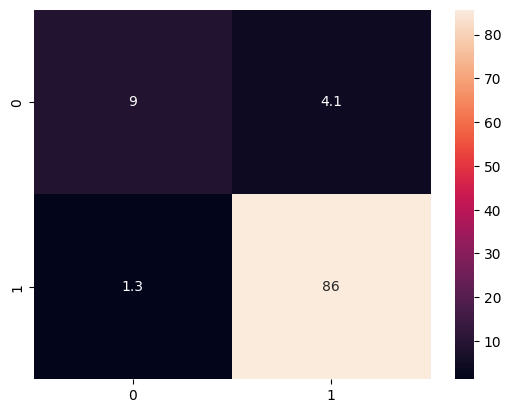

In [77]:
sns.heatmap((confusion_matrix(df_predicted_probs["loan_targets_test"], df_predicted_probs["predicted"]) / loans_targets_test.size) * 100, annot=True)

In [48]:
fpr, tpr, thresholds = roc_curve(df_predicted_probs["loan_targets_test"], df_predicted_probs["predicted"])

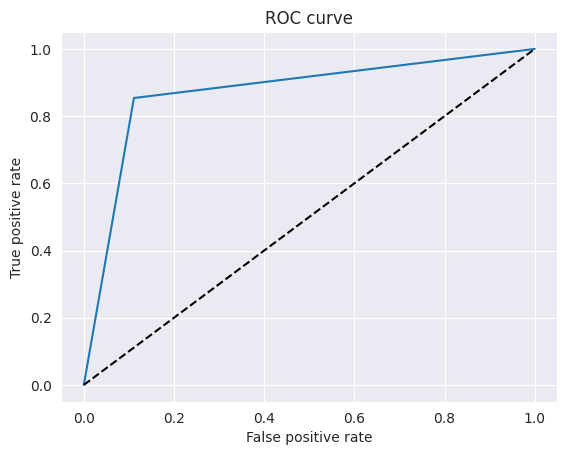

In [49]:
with sns.axes_style("darkgrid"):
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, linestyle="--", color="k")
    plt.title("ROC curve")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

In [50]:
AUROC = roc_auc_score(df_predicted_probs["loan_targets_test"], df_predicted_probs["predicted"])

In [51]:
AUROC

0.8714070791110125